<font color='blue'>Привет! Итак, первый модуль завершен, мы все ближе к реальным бизнес задачам, теперь все серьезно ;) Меня зовут Алексей Алексеев, я проверю твой проект и напишу свои комментарии. Они, в зависимости от результата проверки, будут в </font><font color='green'>зеленом (когда все отлично),</font> <font color='brown'>коричневом (когда можно лучше)</font><font color='blue'> или</font> <font color='red'>красном (когда нужно переделать, чтобы я принял работу).</font><font color='blue'> Ну и в синем будут просто советы и нейтральные комментарии. Постарайся учесть все это в дальнейших проектах.  
Была проделана огромная работа в тренажере, мне на проверку же попадает лишь небольшая часть, поэтому я буду особенно тщательно искать, к чему бы придраться ;)  
    
---    
Апдейт после проверки: работа явно выделяется на фоне остальных, так держать!  
    Более подробно см. блок в конце.</font>

### Описание проекта

Мы выступаем в роли аналитиков компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.
Нам предстоит изучить базу данных и проанализировать влияние парка самолетов и аэропортов назначения на количество полетов в месяц.

### Содержание
<br>
<nav class="toc">
  <ul>
      <li><a href="#step1">Шаг 1.  Открытие файлов с данными и изучение общей информации </a>
  </ul>
  <ul>
      <li><a href="#step2">Шаг 2.  Подготовка данных </a>
  </ul>
  <ul>
      <li><a href="#step3">Шаг 3. Анализ данных </a>
  </ul>
  <ul>    
      <li><a href="#step4">Шаг 4. Общий вывод </a>
  </ul>
</nav>

### Шаг 1.  Открытие файла с данными и изучение общей информации <a id='step1'></a>

In [63]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
from bs4 import BeautifulSoup
sns.set()
#изменим дефолтную палитру seaborn
sns.set_palette("summer")
#прочитаем входящий файл и запишем данные в переменную game_data
aircraft_data = pd.read_csv('/datasets/query_1.csv')
#выведем на экран полученный результат
display(aircraft_data)
#выведем информацию о полученном датафрейме
aircraft_data.info()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


В столбцах датафрейма заключены следующие признаки:
- model — модель самолета
- flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

In [64]:
#прочитаем входящий файл и запишем данные в переменную game_data
flights_data = pd.read_csv('/datasets/query_3.csv')
#выведем на экран полученный результат
display(flights_data)
#выведем информацию о полученном датафрейме
flights_data.info()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


В датафрейме содержится информация о:
- city — городах
- average_fligts — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

### Вывод
<i> В загруженных датафреймых - информация о полетах самолетов с разбивкой на модели и аэропорты прибытия.
На первый взгляд все данные уже занесены в правильных форматах, пропусков нет. Возможно, стоит изменить тип данных по столбцу 'average_flights', но это может несколько исказить данные при окргулении. Название признаков корректно, приведено к нижнему регистру. Корректность данных и наличие выбросов проверим в следующем разделе.
</i>

<font color=green>Данные успешно загружены и изучены с применением верных методов. В этот раз с данными повезло, с ними действительно все в порядке.

<font color=blue>А тип в `average_fligts` действительно можно поменять - с `float64` на, например `float16`. Этого формата достаточно для хранения положительных чисел от нуля до 2000. На большом датасете можно прилично сэкономить.

### Шаг 2.  Подготовка данных <a id='step2'></a>

При помощи парсинга HTML извлечем данные о населении городов из датафрейма flights_data (это пригодится для исследования корреляции количества популяции и кол-ва полетов по городам).

In [65]:
#адрес сайта с необходимой таблицей с данными
URL = 'https://zema.su/blog/polnyi-spisok-vsekh-gorodov-rossii-po-chislennosti-naseleniya'
req = requests.get(URL) # GET-запрос
soup = BeautifulSoup(req.text, 'lxml')

heading_table = [] # Список, в котором будут храниться названия столбцов
for row in soup.find_all('td', attrs = {'class':'rtecenter'}): # Названия столбцов прячутся в элементах td класса 'rtecenter' 
        heading_table.append(row.text.strip()) # Добавляем контент из тега th в список heading_table методом append()

content=[] # Список, в котором будут храниться данные из таблицы
for row in soup.find_all('tr'): 
# Каждая строка обрамляется тегом tr, необходимо пробежаться в цикле по всем строкам
    if not row.find_all('td', attrs = {'class':'rtecenter'}): 
# Эта проверка необходима, чтобы пропустить первую строку таблицы с заголовками
            content.append([element.text.strip() for element in row.find_all('td')])
            # В каждой строке контент ячейки обрамляется тегами <td> </td>
            # Необходимо пробежаться в цикле по всем элементам td, вычленить контент из ячеек и добавить его в список 
            # Затем добавить каждый из списков в список content 

#создадим датафейм из ранее созданных списков
cities = pd.DataFrame(content, columns = heading_table)
cities.drop('№', axis = 1, inplace = True)
#переименуем столбцы
cities.columns = ['city', 'population']
#изменим тип данных в столбце с населением
cities['population'] = cities['population'].astype('int')

#выведем датафрейм
display(cities.info(), cities.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 2 columns):
city          1109 non-null object
population    1109 non-null int64
dtypes: int64(1), object(1)
memory usage: 17.5+ KB


None

,city,population
0,Москва,11514330
1,Санкт-Петербург,4848742
2,Новосибирск,1473737
3,Екатеринбург,1350136
4,Нижний Новгород,1250615


<font color=green>Аплодирую стоя - полученные знания применены по полной программе!

Объединим таблицу flights_data с полученной при помощи парсинга таблицей.

In [66]:
#оставим пересекающиеся строки
city_flights = flights_data.merge(cities, on = 'city', how = 'inner')
city_flights.head()

,city,average_flights,population
0,Абакан,3.870968,165183
1,Анадырь,1.000000,13053
2,Анапа,2.161290,58983
3,Архангельск,5.354839,348716
4,Астрахань,2.451613,520662


Рассмотрим датафрейм city_flights. Начнем с признака названия города 'city'. Проверим его на дубликаты.

In [67]:
#проверим столбец на дубликаты, выведем счетчик уникальных значений
city_flights.duplicated(subset = ['city']).value_counts()

False    101
True       3
dtype: int64

Дубликаты есть, ознакомимся с ними.

In [68]:
#выведем строки с дубликатами
city_flights[city_flights['city'].duplicated() == True]

,city,average_flights,population
9,Благовещенск,1.000000,34246
31,Киров,6.000000,31888
45,Мирный,6.290323,30259


Удалим дубликаты, к счастью, это те дубликаты, в которых население указано неверно.

In [69]:
city_flights = city_flights.drop_duplicates(subset = 'city', inplace = False).reset_index(drop = True)
#проверим результат
city_flights

,city,average_flights,population
0,Абакан,3.870968,165183
1,Анадырь,1.000000,13053
2,Анапа,2.161290,58983
3,Архангельск,5.354839,348716
4,Астрахань,2.451613,520662
...,...,...,...
96,Чита,1.580645,323964
97,Элиста,4.870968,103728
98,Южно-Сахалинск,4.290323,181727
99,Якутск,2.741935,269486


Теперь проверим признак 'average_flights' (среднее число полетов).

In [70]:
#выведем описание столбца
flights_data['average_flights'].describe()

count    101.000000
mean       5.494189
std       13.119790
min        1.000000
25%        2.000000
50%        3.000000
75%        5.870968
max      129.774194
Name: average_flights, dtype: float64

Видно, что в признаке преобладают низкие значения (при минимальном значении 1, среднее - чуть выше 5, медиана - 3). Выведем 5 наиболее высоких значений.

In [71]:
#отсортируем таблицу по признаку 'average_flights' по убыванию и выведем первые 5 строк
flights_data.sort_values(by = 'average_flights', ascending = False).head()

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581


Предсказуемо в крупных городах и число рейсов значительно выше.
Рассмотрим признак подробнее, выведем диаграмму размаха и гистограмму.

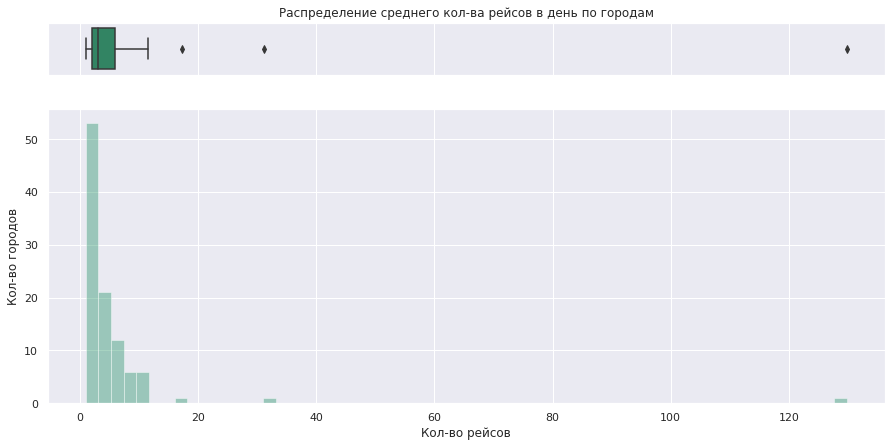

In [72]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True,
gridspec_kw={"height_ratios": (.15, .85)})

fig.set_size_inches(15, 7)
#вызываем диаграмму размаха
sns.boxplot(flights_data['average_flights'], ax=ax_box).set_title('Распределение среднего кол-ва рейсов в день по городам')
#вызываем гистограмму, перед этим отбросим NaN, присвоим название графикам из списка
sns.distplot(flights_data['average_flights'].dropna(), kde = False, 
                 ax=ax_hist, bins = len(flights_data['average_flights'].value_counts()))
#присвоим путые значения оси y диаграммы размаха
ax_box.set(yticks=[])
#уберем подпись оси x для диаграммы размаха
ax_box.set(xlabel = '')
plt.xlabel('Кол-во рейсов')
plt.ylabel('Кол-во городов');

Учитывая условия дальнейших исследований (график топ-10 городов по входящим рейсам), удалять выбросы не будем. Можно предположить, что эти данные несколько утрированы и оторваны от реальности, 130 рейсов в день в один город для одной компании - нереально высокое количество.

Принято решение не изменять тип данных по столбцу 'average_flights', но округлить значения стоит.

In [73]:
#округлим значения до 2 знаков после запятой
city_flights['average_flights'] = city_flights['average_flights'].round(2)
city_flights.head()

,city,average_flights,population
0,Абакан,3.87,165183
1,Анадырь,1.00,13053
2,Анапа,2.16,58983
3,Архангельск,5.35,348716
4,Астрахань,2.45,520662


Можно рассмотреть таблицу aircraft_data, но при импорте данных и первичном осмотре очевидно, что все типы и данных правильны, пропусков, дубликатов и артефактов нет. На всякий случай применим функцию describe.

In [74]:
aircraft_data.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


Значения количества полетов явно зависят от модели самолета, скорее всего небольших самолетов больше, следовательно, и полетов на них тоже больше.

### Вывод

- При помощи парсинга были извлечены и присоединены данные с населением городов прилета рейсов - это пригодится в дальнейших исследованиях
- Были изучены данные в датафреймах flights_data и aircraft_data, признаки проверены на наличие дубликатов, артефактов и пропусков
- Данные в столбце 'average_flights' округлены до двух знаков после запятой.

<font color=green>Отличный креативный шаг. Очень классно обогатил данные из внешнего источника.

### Шаг 3.  Анализ данных <a id='step3'></a>

Для автоматизации построения графиков напишем функцию.

In [75]:
#автоматизируем построение графиков, написав функцию, получающую на вход
#датафрейм, название графика, подписи по осям x и y
def graph(data, title, xlabel, ylabel):
    """
    функция, выводящая график для определенного признака
    
    """
    fig = plt.gcf()
    #условие высоты фигуры
    if len(data) < 15:
        fig.set_size_inches(14, len(data))
    else:
        fig.set_size_inches(14, len(data) / 3.5)
    #вывод графика, тип - столбчатый       
    sns.barplot(data = data, x = data.columns[1], y = data.columns[0], palette = 'summer')
    #название графика
    plt.title(title)
    #подпись оси x
    plt.xlabel(xlabel)
    #подпись оси y
    plt.ylabel(ylabel)

Рассмотрим датафрейм aircraft_data.

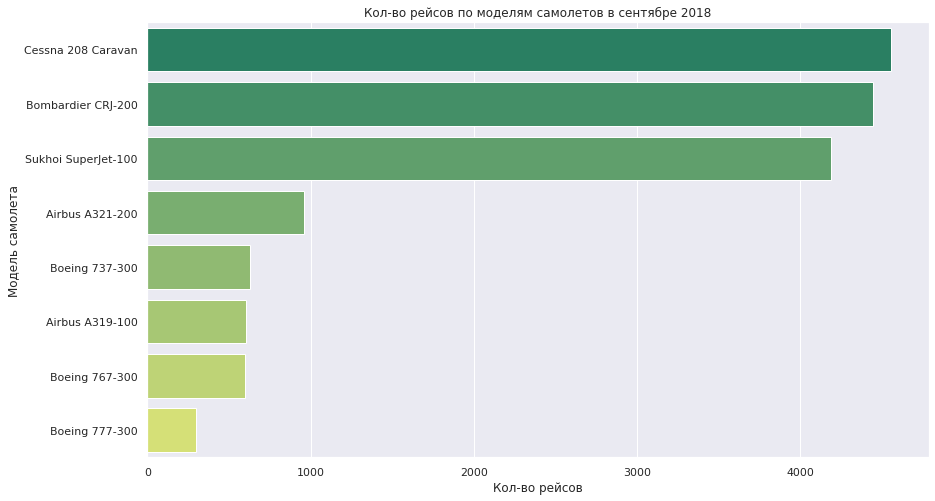

In [76]:
#применим функцию graph к датафрейму aircraft_data
graph((aircraft_data.sort_values(by = 'flights_amount', ascending = False)),
      'Кол-во рейсов по моделям самолетов в сентябре 2018', 'Кол-во рейсов', 'Модель самолета')

Наблюдаем следующую картину - чем меньше самолет и его вместимость, тем больше рейсов совершается на этой модели самолета. Скорее всего, такие самолеты чаще всего используют для полетов в небольшие города с малым пассажиропотоком или в частных и чартерных рейсах. Количество таких самолетов в парке тоже должно быть высоким, отсюда и большое количество рейсов. <br>
С большими самолетами обратная ситуация - чем крупнее модель самолета, тем меньше рейсов на нем осуществляется. Такие самолеты дороже, но имеют большую вместимость, поэтому при малом количестве рейсов мы имеем большой пассажиропоток. Судя по парку самолетов и количеству рейсов, наша авиакомпания достаточно крупная.

<font color=green>Данные не только визуализированы, но и проведен исчерпывающий анализ причинно-следственных связей, отлично.

Выберем топ-10 городов по количеству входящих рейсов.

In [77]:
#отсортируем таблицу по 
top_flights = city_flights.sort_values(by = 'average_flights', ascending = False).reset_index(drop = True).head(10)
top_flights

,city,average_flights,population
0,Москва,129.77,11514330
1,Санкт-Петербург,31.16,4848742
2,Новосибирск,17.32,1473737
3,Красноярск,11.58,973891
4,Екатеринбург,11.32,1350136
5,Ростов-на-Дону,10.19,1089851
6,Пермь,10.13,991530
7,Брянск,10.00,415640
8,Сочи,9.61,343285
9,Ульяновск,9.58,613793


Построим график зависимости кол-ва рейсов от города для найденных топ-10 городов.

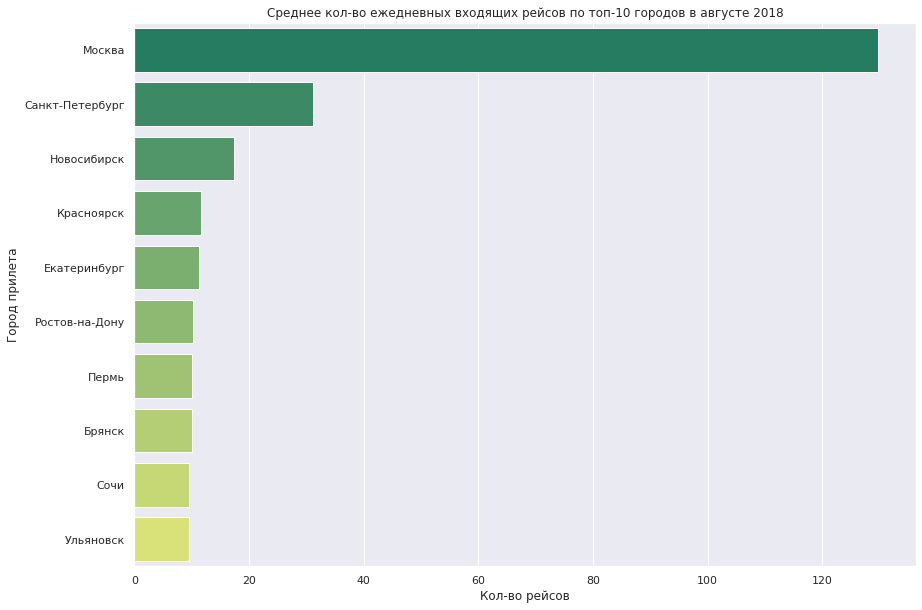

In [78]:
graph(top_flights, 'Среднее кол-во ежедневных входящих рейсов по топ-10 городов в августе 2018', 
      'Кол-во рейсов', 'Город прилета')

На первый взгляд, все логично, больше город - больше рейсов, в столицы летают больше всего.

Теперь построим аналогичный график для всех городов из датафрейма.

<font color=blue>Интересно, однако, что Бранск обогнал Сочи.

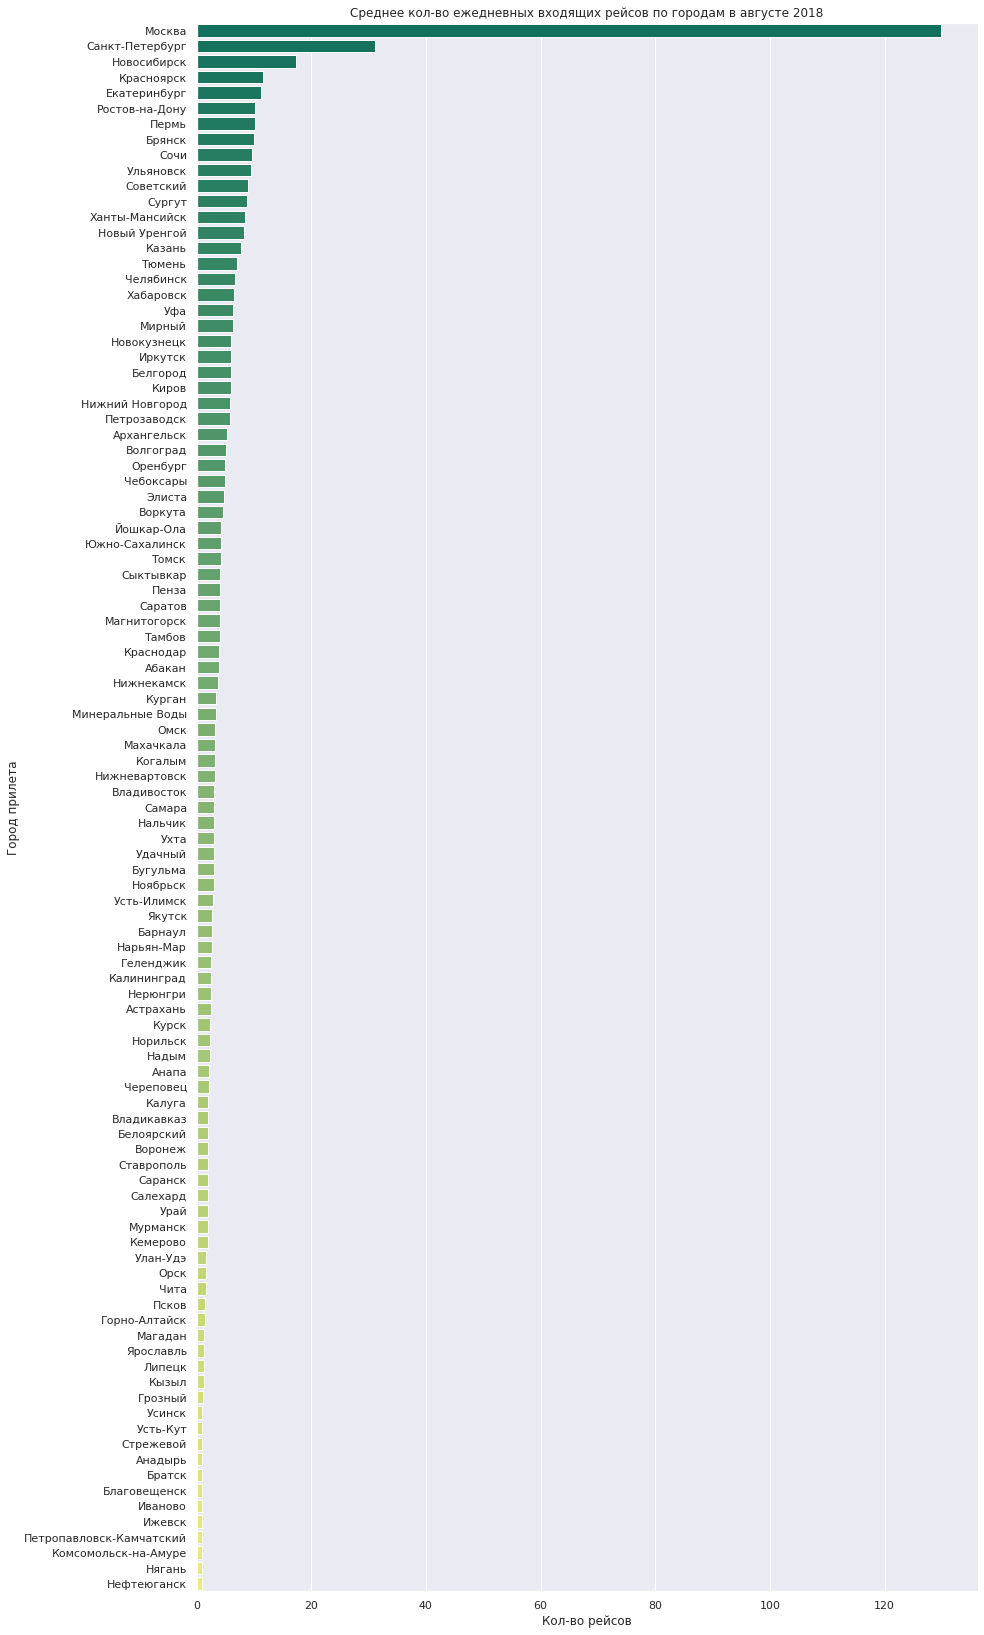

In [79]:
graph(city_flights.sort_values(by = 'average_flights', ascending = False),
      'Среднее кол-во ежедневных входящих рейсов по городам в августе 2018', 'Кол-во рейсов', 'Город прилета')

<font color=green>Ухх, отобразили необотразимое 👍 Отличный ход изобразить график вертикально.

Рассмотрим зависимость среднего ежедневного количества полетов от населения города. Построим диаграмму рассеивания.

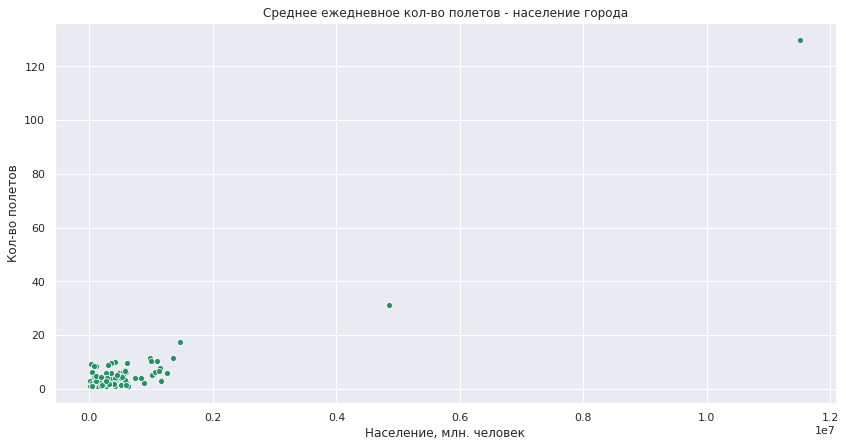

In [80]:
fig = plt.gcf()
fig.set_size_inches(14, 7)
#диаграмма рассеивания зависимости населения от среднего ежедневного числа полетов по городам
sns.scatterplot(x = 'population', y = 'average_flights', data = city_flights)
#название графика
plt.title('Среднее ежедневное кол-во полетов - население города')
#подпись оси x
plt.xlabel('Население, млн. человек')
#подпись оси y
plt.ylabel('Кол-во полетов');

Рассчитаем коэффициент корреляции. Для уменьшения негативного влияния выбросов изменим метод расчета корреляции на ранговый метод Спирмена.

In [81]:
print('Коэффициент корреляции количества полетов от населения города: {}'
         .format(city_flights['population'].corr(city_flights['average_flights'], method = 'spearman' )))

Коэффициент корреляции количества полетов от населения города: 0.4434482021713095


Взаимосвязь кол-ва полетов и населения города оказалась не очень высокой, видимо, население города - не основной фактор, влияющий на пассажиропоток аэропорта. Теоретически на это должна оказывать влияния также туристическая привлекательность города и тот фактор, является ли данный город деловым центром, что увеличивает потом пассажиров, прибывающим по рабочим делам. Также возможна вероятность того, что прилетающие люди зачастую используют данный аэропорт как промежуточный пункт (как пересадка на другой рейс) или как ближайший аэропорт требуемого места назначения (возможно, этот аэропорт обслуживает несколько близлежащих городов).
<br>
Как вариант, можно предположить, что наша авиакомпания в какие-то города летает больше, в какие-то меньше не только из-за размера города и рассмотренных выше факторов, а из-за политики компании или тем, что какие-то направления заняты другими авиакомпаниями. Так, к примеру, Казань оказалась ниже таких городов как Ульяновск, Пермь и Брянск, меньших по численности населения и не представляющих высокого интереса для туризма.

<font color=green>Вновь прекрасные выводы, причины и следствия. 

### Вывод
<i> 
Были исследованы зависимости месячного количества полетов по разным моделям самолетов. Меньшие по размеру самолеты летают значительно чаще, скорее всего из-за того, что в небольшие аэропорты крупные лайнеры или не могут сесть, или такое больше количество пассажиров не требуется перевозить. Также могут влиять какие-то частные полеты и чартерные рейсы для небольших организаций.

Взаимосвязь количества принимаемых рейсов от населения города, в котором расположен аэропорт, оказалась средней. Видимо, на это влияют многие другие факторы, такие как туристическая и бизнес привлекательность, близкая расположенность других крупных городов и агломераций рядом с аэропортом, или ее отсутствие.
</i>

### Шаг 4. Общий вывод <a id='step4'></a>

<i>Мной была проведена работа по исследованию влияния парка самолетов и аэропортов назначения на количество полетов в месяц.
Загружены данные датафреймов с информацией о парке самолетов и кол-ве выполненных рейсов, городов прилета и Проведен парсинг HTML для импорта данных населения городов датафрейма flights_data. Были проверены типы данных в тех столбцах, где это требовалось для дальнейшего удобства работы над проектом, найдены и удалены дубликаты.
<br>Рассмотрена зависимость месячного кол-ва полетов от модели самолета, построен столбчатый график. Найдена зависимость - чем меньше самолет и его вместимость, тем больше рейсов совершается на этой модели самолета и наоборот. Скорее всего это зависит и от кол-ва самолетов каждой модели в парке и специфики их использования. Судя по парку самолетов и количеству рейсов, наша авиакомпания достаточно крупная.
<br>Взаимосвязь кол-ва полетов и населения города средняя. Видимо, кол-во входящих рейсов зависит не только от величины города, но и от других факторов (туристическая и деловая привлекательность, наличие и отсутствие крупных населенных пунктов без аэропортов по соседству).
</i>

<font color=blue>Итак, проект был небольшой, но ты и в нем ты отлично себя проявляешь. Данные успешно изучены, по ним построены *наглядные* визуализации. Что самое важное, сделаны верные выводы и установлены причинно-следственные связи. Конечно, отдельный **жирный** плюс за парсинг внешних данных. Работу безусловно принимаю. 